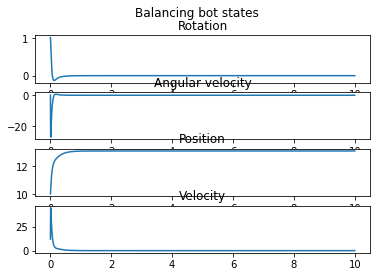

In [1]:
import numpy as np 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Physical parameters
g   = 9.8
b_f = 0
m_b = 0.381
l_b = 0.112
I_b = 0.00616
m_w = 0.036
l_w = 0.021
I_w = 0.00000746
R_m = 4.4
L_m = 0
b_m = 0
K_e = 0.444
K_t = 0.470

# Simulation parameters
delta_t = 0.001
simulation_time = 10000
x0 = [1, 10, 10, 0.1]
reference = [0, 0]

# Controller parameters
K_p = -1000  
K_i = -10
integrated_error = 0


# Model on form x_dot = f(x, x_dot, u)
def f(x, x_next, u):
    f_1 = x[1]
    f_2 = (m_b*l_b*g*np.sin(x[0]) - m_b*l_b*x_next[3]*np.cos(x[0]) - (K_t/R_m)*u + ((K_e*K_t/R_m) + b_f)*(x[3]/l_w - x[1]))/(I_b + m_b*l_b*l_b)
    f_3 = x[3]
    f_4 = (-m_b*l_b*l_w*x_next[1]*np.cos(x[0]) + m_b*l_w*l_b*x[1]*x[1]*np.sin(x[0]) + K_t/R_m*u - ((K_e*K_t/R_m) + b_f)*(x[3]/l_w - x[1]))/(I_w/l_w + l_w*m_b + l_w*m_w)
    return (f_1, f_2, f_3, f_4)

# Equation for x_next = x + delta_t * f(x) on form g(x) = 0
def newtonMethodEquation(x, x_next, u):
    return np.asarray(x) - np.asarray(x_next) + delta_t*np.asarray(f(x,x_next, u))


# A controller based on the error 
def controller(e):
    global integrated_error
    integrated_error += e[0]
    return K_p*e[0] + K_i* integrated_error

# An implicit euler integrator
def integrator(x):
    
    # Calculate controller output
    e = np.asarray(reference) - np.asarray([x[0], x[2]])
    u = controller(e)

    # Insert all known variables into the equation (everythin except x_next)
    equation = lambda x_next : newtonMethodEquation(x, x_next, u)

    # Find x_next using Newton's method and return x_next
    return fsolve(equation, x)



def runSimulation():

    # Lists used for plotting the simulation
    states = []
    t = []

    # Set current state to initial condition
    x = x0
    for i in range(simulation_time):
        x = integrator(x)
        states.append(x)
        t.append(i*delta_t)

    # Convert the states to Numpy type
    states = np.asmatrix(states)

    # Plot the simulation
    fig, axs = plt.subplots(4)
    fig.suptitle("Balancing bot states")
    axs[0].plot(t, states[:,0])
    axs[0].set_title("Rotation")
    axs[1].plot(t, states[:,1])
    axs[1].set_title("Angular velocity")
    axs[2].plot(t, states[:,2])
    axs[2].set_title("Position")
    axs[3].plot(t, states[:,3])
    axs[3].set_title("Velocity")
    plt.show()

if __name__ == "__main__":
    runSimulation()

